In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

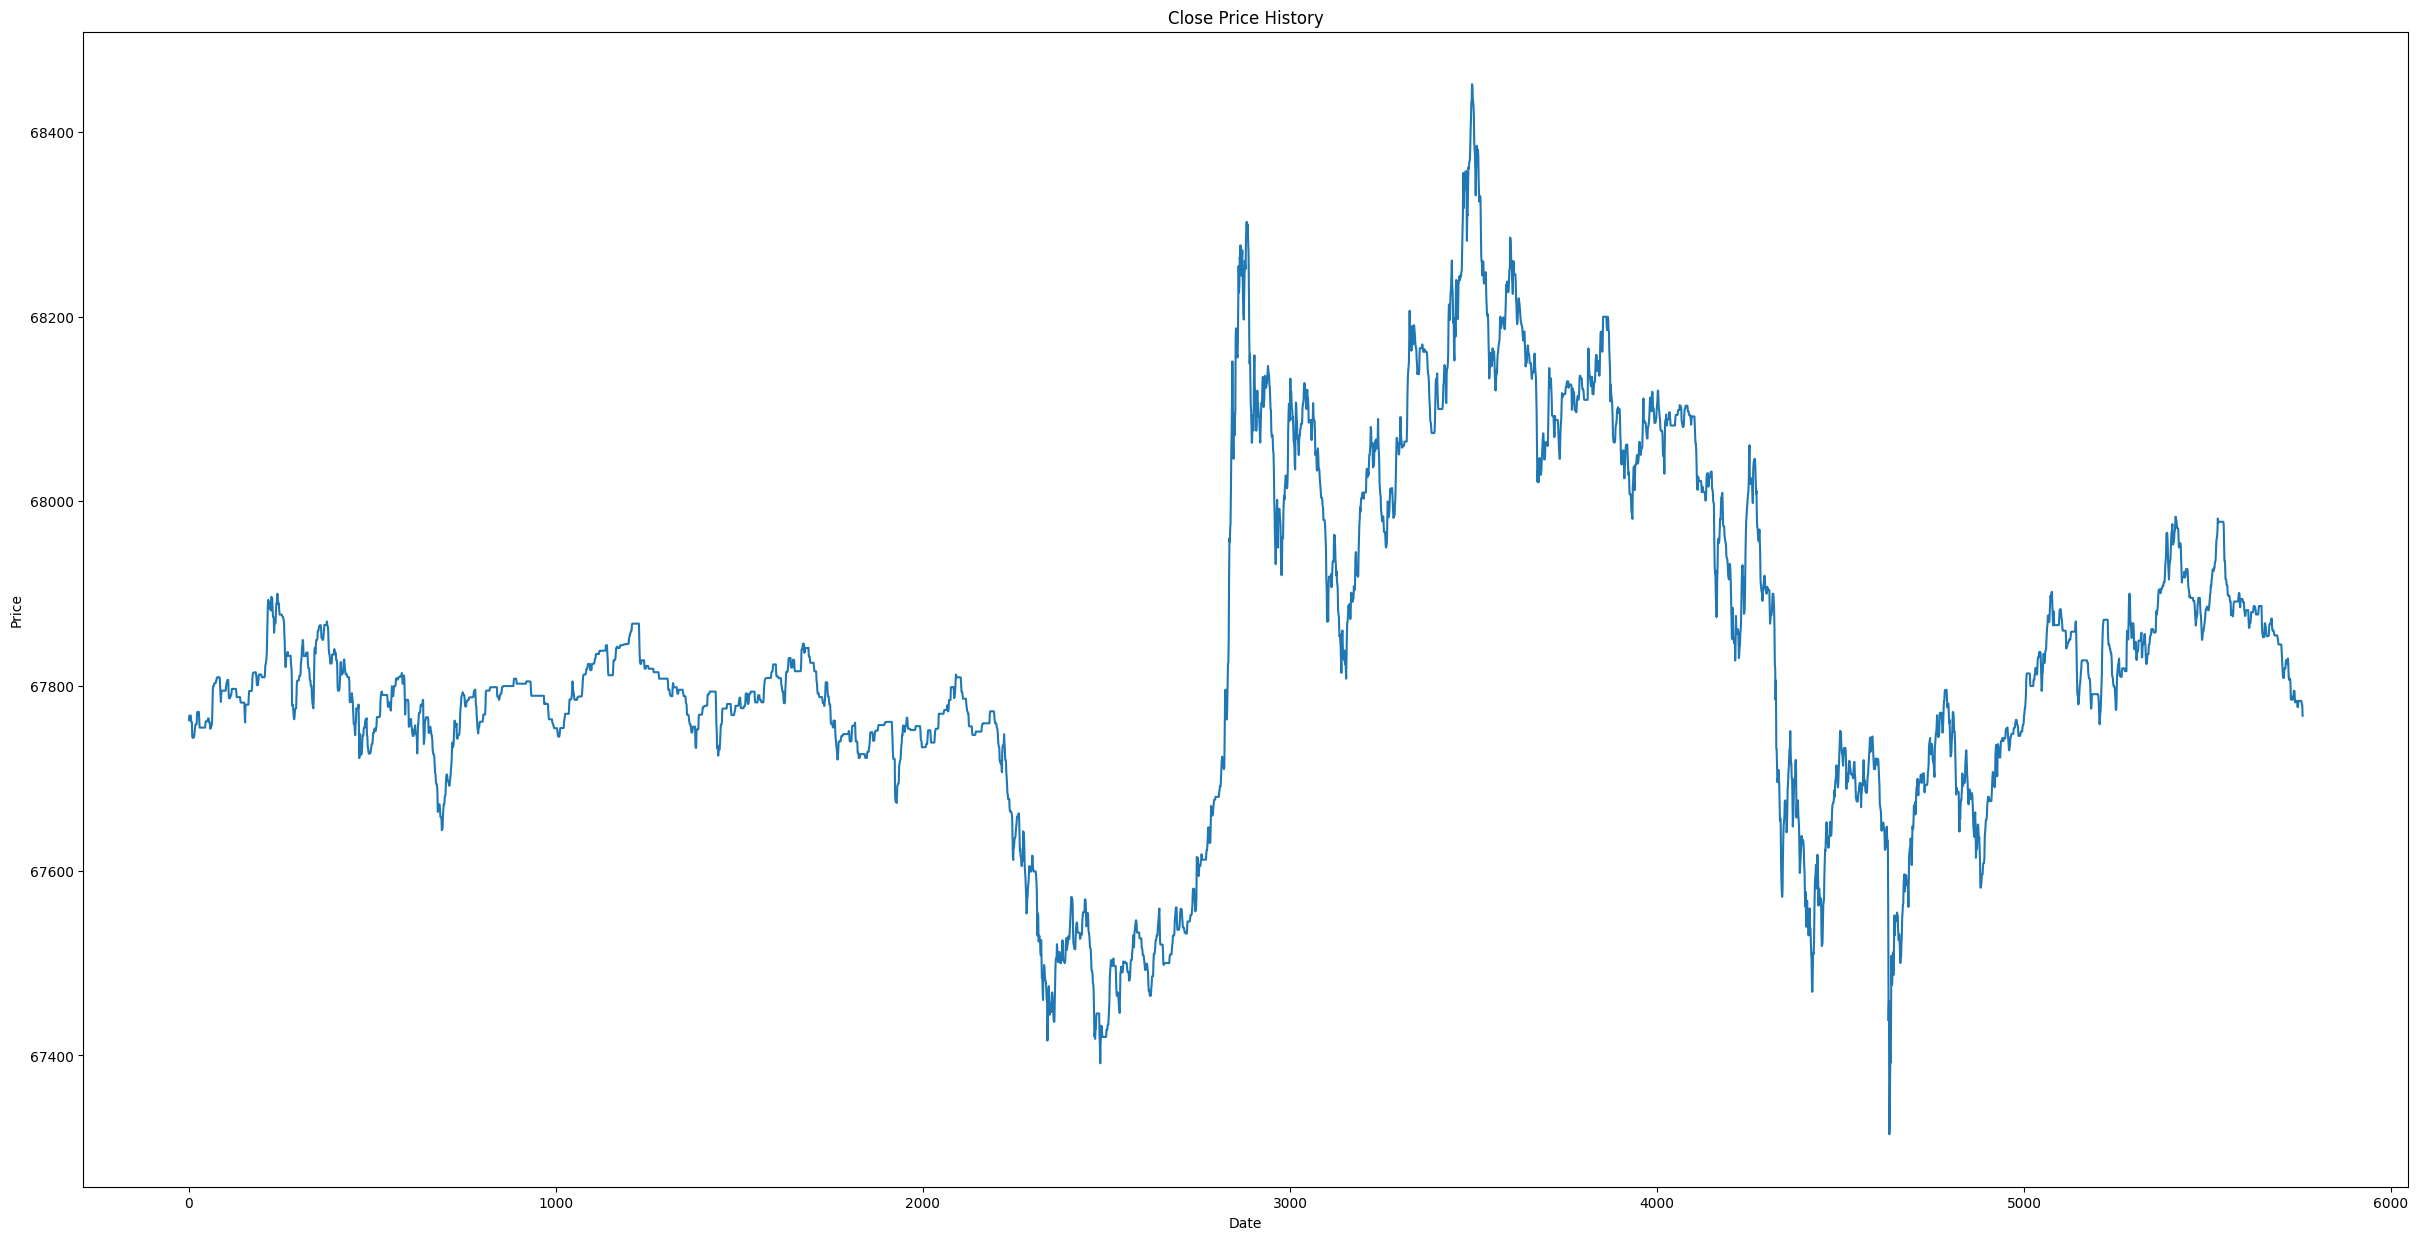

In [2]:
some_day_observations = pd.read_csv("../data/raw/dumps_aggregated1.csv")

# Plot the "Close" price from some_day_observations
plt.figure(figsize=(30,15))
plt.plot(some_day_observations['Close'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [23]:
# Let's annotate the worst and best possible decisions what the agent could have made
first_price = some_day_observations['Close'][0]
second_price = some_day_observations['Close'][1]
worst_annotations = ["Buy" if second_price <= first_price else "Sell"]
best_annotations = ["Sell" if second_price <= first_price else "Buy"]
worst_open_flag = True if worst_annotations[0] == "Buy" else False
best_open_flag = True if best_annotations[0] == "Buy" else False

for price_step in range(1, len(some_day_observations) - 1):
    current_price = some_day_observations['Close'][price_step]
    next_price = some_day_observations['Close'][price_step + 1]
    if worst_open_flag: # If worst agent has an open position he must close at the worst moment
        if next_price > current_price: # If the price will increase, worst decision is to Sell
            worst_annotations.append("Sell")
            worst_open_flag = False
        else: # If the price will decrease or stay the same, worst agent will wait for the worst moment to sell
            worst_annotations.append("Hold")
    else: # If worst agent doesn't have an open position he must open at the worst moment
        if next_price < current_price: # If the price will decrease, worst decision is to Buy
            worst_annotations.append("Buy")
            worst_open_flag = True
        else: # If the price will increase or stay the same, worst agent will wait for the worst moment to buy
            worst_annotations.append("Hold")

    if best_open_flag: # If best agent has an open position he must close at the best moment
        if next_price < current_price: # If the price will decrease, best decision is to Sell
            best_annotations.append("Sell")
            best_open_flag = False
        else: # If the price will increase or stay the same, best agent will wait for the best moment to sell  
            best_annotations.append("Hold")
    else: # If best agent doesn't have an open position he must open at the best moment
        if next_price > current_price: # If the price will increase, best decision is to Buy
            best_annotations.append("Buy")
            best_open_flag = True
        else: # If the price will decrease or stay the same, best agent will wait for the best moment to buy
            best_annotations.append("Hold")
worst_annotations.append("Hold")
best_annotations.append("Hold")
interval_start = 30
interval_end = 40
for i in range(interval_start, interval_end):
    print(f"Price: {some_day_observations['Close'][i]}")
    print(f"Best decision: {best_annotations[i]}")
    print(f"Worst decision: {worst_annotations[i]}")
    print()

Price: 67755.00733333333
Best decision: Hold
Worst decision: Hold

Price: 67755.00733333333
Best decision: Sell
Worst decision: Buy

Price: 67755.00666666667
Best decision: Hold
Worst decision: Hold

Price: 67755.004
Best decision: Hold
Worst decision: Hold

Price: 67755.00333333333
Best decision: Buy
Worst decision: Sell

Price: 67755.00533333333
Best decision: Hold
Worst decision: Hold

Price: 67755.00533333333
Best decision: Sell
Worst decision: Buy

Price: 67755.004
Best decision: Buy
Worst decision: Sell

Price: 67755.00533333333
Best decision: Hold
Worst decision: Hold

Price: 67755.006
Best decision: Hold
Worst decision: Hold



In [24]:
# Check that all trades are closed
open_flag = None
for price_step, annotation in enumerate(best_annotations):
    if open_flag is not None:
        if annotation == "Buy" and open_flag:
            print("Error: trade opened twice without closing at step", price_step)
            break
        
        if annotation == 'Sell' and not open_flag:
            print("Error: trade closed without opening at step", price_step)
            break

    if annotation == "Buy":
        open_flag = True

    if annotation == "Sell":
        open_flag = False


In [25]:
# For each annotation, calculate the profit/regret history
def calculate_profit_reget_history(some_day_observations, decision_annotations):
    profit_annotation = [0]
    profit_annotation = [0]
    trade_open_step = 0 if decision_annotations[0] == "Buy" else None
    trade_close_step = 0 if decision_annotations[0] == "Sell" else None

    for price_step in range(1, len(some_day_observations)):
        current_price = some_day_observations['Close'][price_step]
        if decision_annotations[price_step] == "Hold":
            if trade_open_step is not None:
                open_price = some_day_observations['Close'][trade_open_step]
                profit_annotation.append(current_price / open_price - 1)
            elif trade_close_step is not None:
                close_price = some_day_observations['Close'][trade_close_step]
                profit_annotation.append(1 - current_price / close_price)
        elif decision_annotations[price_step] == "Buy":
            close_price = some_day_observations['Close'][trade_close_step]
            profit_annotation.append(1 - current_price / close_price)
            trade_open_step = price_step
            trade_close_step = None
        elif decision_annotations[price_step] == "Sell":
            open_price = some_day_observations['Close'][trade_open_step]
            profit_annotation.append(current_price / open_price - 1)
            trade_close_step = price_step
            trade_open_step = None

    return profit_annotation


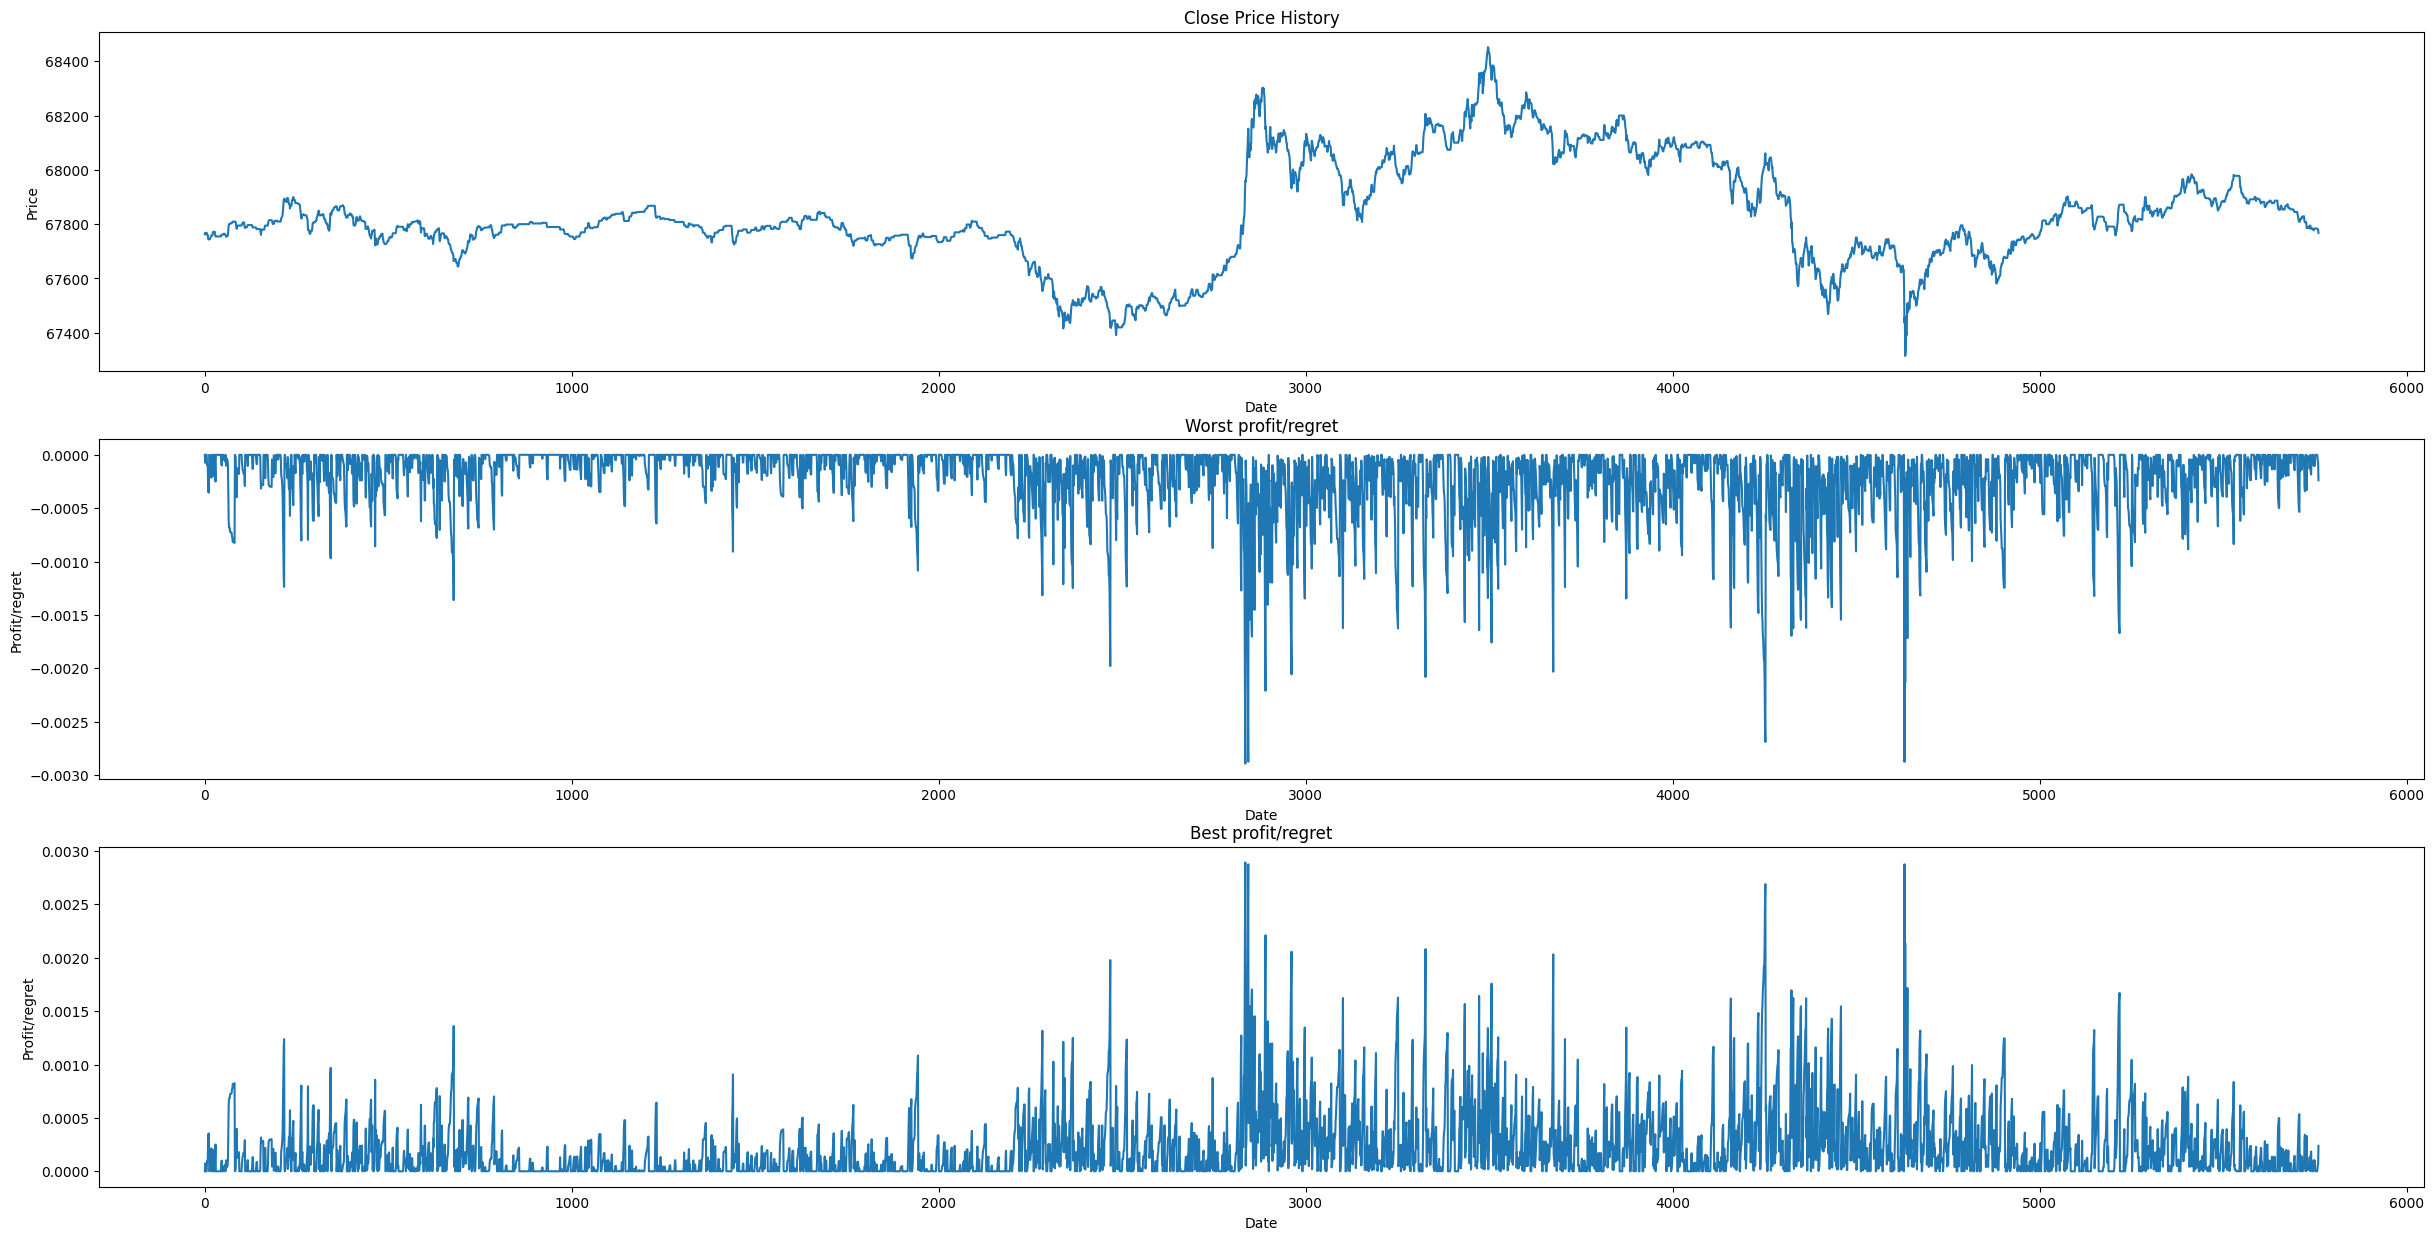

In [28]:
worst_profit_regret = calculate_profit_reget_history(some_day_observations, worst_annotations)
best_profit_regret = calculate_profit_reget_history(some_day_observations, best_annotations)

start_step = 0
end_step = len(some_day_observations)

# Make 3 subplots: close price, worst profit/regret, best profit/regret
plt.figure(figsize=(30,15))
plt.subplot(3, 1, 1)
plt.plot([i for i in range(len(some_day_observations))][start_step:end_step], some_day_observations['Close'][start_step:end_step])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(3, 1, 2)
plt.plot([i for i in range(len(worst_profit_regret))][start_step:end_step], worst_profit_regret[start_step:end_step])
plt.title('Worst profit/regret')
plt.xlabel('Date')
plt.ylabel('Profit/regret')

plt.subplot(3, 1, 3)
plt.plot([i for i in range(len(best_profit_regret))][start_step:end_step], best_profit_regret[start_step:end_step])
plt.title('Best profit/regret')
plt.xlabel('Date')
plt.ylabel('Profit/regret')

plt.show()